In [32]:
from btgenerate.database.database import Database
from matplotlib import pyplot as plt
import pandas as pd

In [76]:
db = Database(db="mars_db")
df1 = db.pull(table="manual_materials")
df_DM = df1[df1["experiment"] == "DMDMOS_trial"].iloc[:, :7]
electrolyte_ids = df_DM["electrolyte_id"].tolist()
df_DM

,generation_id,electrolyte_id,note,generation_project,experiment,generation_method,total_mass(g)
81,85,21-7-525,b'1.5 M LiFSI in DMDMOS',DOE_electrolyte,DMDMOS_trial,literature,10.098
99,103,21-7-567,b'21-7-32 W/ 1% DMDMOS',DOE_electrolyte,DMDMOS_trial,manual,10.001
100,104,21-7-568,b'21-7-32 W/ 6% DMDMOS',DOE_electrolyte,DMDMOS_trial,manual,10.001
122,137,21-7-607,b'21-7-69 W/ 2% DMDMOS',DOE_electrolyte,DMDMOS_trial,manual,10.000
123,138,21-7-608,b'21-7-69 W/ 7% DMDMOS',DOE_electrolyte,DMDMOS_trial,manual,10.000
124,139,21-7-609,b'21-7-95 W/ 5% DMDMOS',DOE_electrolyte,DMDMOS_trial,manual,10.000
126,141,21-7-615,b'21-7-95 W/ 10% DMDMOS',DOE_electrolyte,DMDMOS_trial,manual,17.998
127,142,21-7-616,b'21-7-151 W/ 4% DMDMOS',DOE_electrolyte,DMDMOS_trial,manual,17.999
128,143,21-7-617,b'21-7-151 W/ 9% DMDMOS',DOE_electrolyte,DMDMOS_trial,manual,17.999
131,146,21-7-623,b'21-7-346 W/ 3% DMDMOS',DOE_electrolyte,DMDMOS_trial,manual,18.000


In [77]:
df_DM = df_DM[:6] # So far 21-7-615 and beyond are not ready yet

In [81]:
df_DM_comp = df1.iloc[df_DM.index.to_numpy(), 7:]
df_DM_comp = df_DM_comp.loc[:, ~(df_DM_comp == 0).all(axis=0).to_numpy()]
df_DM_comp.insert(loc=0, column="electrolyte_id", value=df_DM["electrolyte_id"])
df_DM_comp

,electrolyte_id,LiPF6,LiTFSI,LiFSI,LiPO2F2,LiBOB,EC,DMC,Sulfolane,FEC,CsNO3,S1,DMDMOS
81,21-7-525,0.000,0.000,2.74,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.358
99,21-7-567,0.069,1.141,0.00,0.000,0.513,3.045,4.527,0.000,0.198,0.290,0.118,0.100
100,21-7-568,0.069,1.141,0.00,0.000,0.513,2.849,4.236,0.000,0.185,0.290,0.118,0.600
122,21-7-607,0.076,1.140,0.00,0.000,0.518,3.035,4.513,0.000,0.197,0.292,0.029,0.200
123,21-7-608,0.076,1.140,0.00,0.000,0.518,2.839,4.221,0.000,0.185,0.292,0.029,0.700
124,21-7-609,0.514,0.513,0.80,0.099,0.496,1.616,1.616,3.232,0.185,0.318,0.111,0.500


In [82]:
df2 = db.pull(table="half_cell_classifier")
df_lce = df2[df2["sample_id"].isin(electrolyte_ids).to_numpy()].iloc[:, :-5]
df_lce.iloc[:, [0,-1]].groupby(by="sample_id", axis=0).max()

,final_LCE
sample_id,
21-7-525,0.938109
21-7-607,0.923077
21-7-608,0.857143
21-7-609,0.836066


In [ ]:
availabel_ids = ["21-7-625", "21-8-630"]

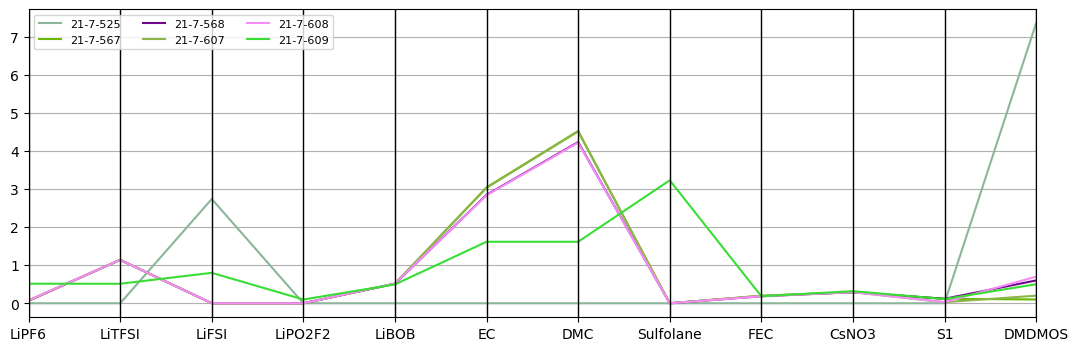

In [83]:
fig, ax = plt.subplots(figsize=(df_DM_comp.shape[1], 4))
pd.plotting.parallel_coordinates(df_DM_comp,  class_column="electrolyte_id", ax=ax)
ax.legend(ncol=3, fontsize=8)
plt.show()